# Principal Component Analysis vs. Linear Discriminant Analysis

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.
![Image of Yaktocat](http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

## Summarizing the LDA approach in 5 steps

Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

1) Compute the d-dimensional mean vectors for the different classes from the dataset.

2) Compute the scatter matrices (in-between-class and within-class scatter matrix).

3) Compute the eigenvectors ($e_1,e_2,...,e_d$) and corresponding eigenvalues ($λ_1,λ_2,...,λ_d$) 

4) Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d×k$ dimensional matrix $W$(where every column represents an eigenvector).

5) Use this $d×k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y=X×W$(where $X$ is a $n×d$-dimensional matrix representing the $n$ samples, and $y$ are the transformed $×k$-dimensional samples in the new subspace).

## About the Iris dataset

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

**Reference:** Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

`Iris-setosa (n=50)` 

`Iris-versicolor (n=50)`

`Iris-virginica (n=50)`

The four features of the Iris dataset:

`sepal length in cm`

`sepal width in cm`

`petal length in cm`

`petal width in cm`

![petal](http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png)

In [11]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class label']
df.dropna(how="all", inplace=True)
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
print(label_encoder.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

/Users/tarunsunkaraneni/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


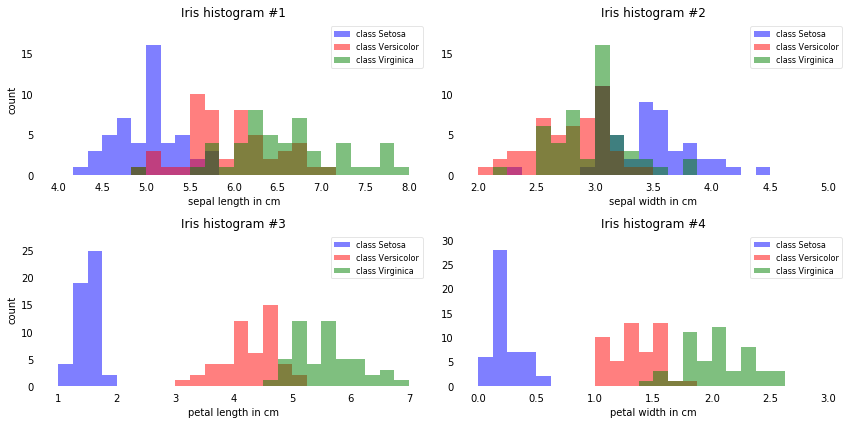

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(df.columns[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()


## Step 1: Computing the d-dimensional mean vectors

In this first step, we will start off with a simple computation of the mean vectors $m_i =(i=1,2,3)$of the 3 different flower classes:

In [23]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class {}: {}\n'.format(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]

